# Simple character classification (notMNIST dataset)

In [2]:
import numpy as np
from matplotlib import pyplot as plt
import os
%matplotlib inline
plt.style.use('ggplot')

## Read data 

In [6]:
rootdir = "db/notMNIST_small/"
image_names = []
labels = []
[subdirs for subdirs in os.listdir(rootdir)]
#[img for img in os.listdir(d) if img.endswith('png')]
for dirpath, dirname, files in os.walk(rootdir):
    for f in files:
        if f.endswith('.png'):
            image_names.append(os.path.join(dirpath,f))
            labels.append(dirpath.split('/')[1])
print image_names[:5], labels[:5]

['db/notMNIST_small/A/MDEtMDEtMDAudHRm.png', 'db/notMNIST_small/A/MDRiXzA4LnR0Zg==.png', 'db/notMNIST_small/A/MjAwcHJvb2Ztb29uc2hpbmUgcmVtaXgudHRm.png', 'db/notMNIST_small/A/MlJlYmVsc0RldXgtQmxhY2sub3Rm.png', 'db/notMNIST_small/A/MlRvb24gU2hhZG93LnR0Zg==.png'] ['notMNIST_small', 'notMNIST_small', 'notMNIST_small', 'notMNIST_small', 'notMNIST_small']


!ls
img = plt.imread(image_names[0])
plt.imshow(img)

## Sample subset of data at random

In [7]:
data = []
target = []
number_of_images = 10000
for i in range(1, number_of_images + 1):
    rand_int = np.random.randint(0,len(image_names))
    img_name = image_names[rand_int]
    label = labels[rand_int]
    try:
        img = plt.imread(img_name)
    except:
        continue
    data.append(img)
    target.append(label)
#     plt.subplot(number_of_images,1,i)
#     plt.imshow(img)
#     plt.ylabel(label)

data = np.array(data)
# target

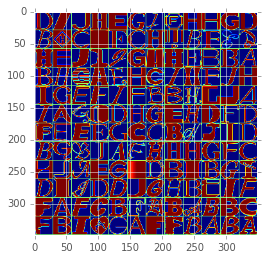

In [13]:
def montage(images, saveto='montage.png'):
    if isinstance(images, list):
        images = np.array(images)
    img_h = images.shape[1]
    img_w = images.shape[2]
    n_plots = int(np.ceil(np.sqrt(images.shape[0])))
    if len(images.shape) == 4 and images.shape[3] == 3:
        m = np.ones(
            (images.shape[1] * n_plots + n_plots + 1,
             images.shape[2] * n_plots + n_plots + 1, 3)) * 0.5
    else:
        m = np.ones(
            (images.shape[1] * n_plots + n_plots + 1,
             images.shape[2] * n_plots + n_plots + 1)) * 0.5
    for i in range(n_plots):
        for j in range(n_plots):
            this_filter = i * n_plots + j
            if this_filter < images.shape[0]:
                this_img = images[this_filter]
                m[1 + i + i * img_h:1 + i + (i + 1) * img_h,
                  1 + j + j * img_w:1 + j + (j + 1) * img_w] = this_img
    plt.imsave(arr=m, fname=saveto)
    return m

plt.imshow(montage(data[:144]))

## Data processing

9999 9999


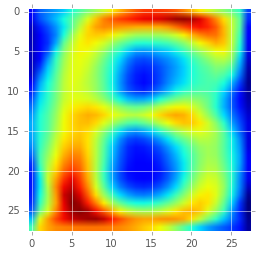

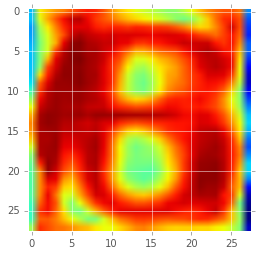

In [239]:
print len(data), len(target)
img_mean = np.mean(data,axis=0)
plt.imshow(np.mean(data,axis=0))#, cmap='gray')
plt.figure()
img_std = np.std(data,axis=0)
plt.imshow(np.std(data,axis=0))#, cmap='gray')

(array([  28.,   82.,   96.,   94.,  113.,  127.,  112.,   76.,   31.,   25.]),
 array([ 0.15489572,  0.2120362 ,  0.26917669,  0.32631717,  0.38345765,
         0.44059813,  0.49773861,  0.55487909,  0.61201957,  0.66916006,
         0.72630054]),
 <a list of 10 Patch objects>)

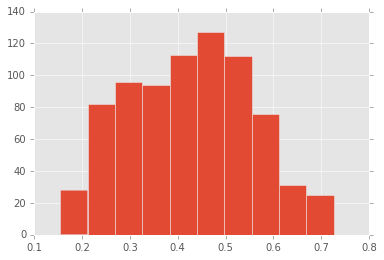

In [238]:
plt.hist(img_mean.ravel())

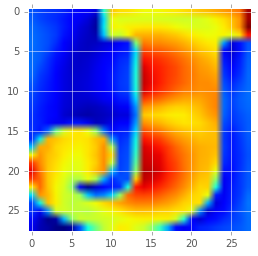

In [225]:
img_normal = (d[0]- img_mean)/img_std
plt.imshow(img_normal)

## Logistic regression classifier

In [240]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression
from sklearn import preprocessing
# sklearn expects 1 row per instance and 1 column per feature
X = data.ravel()
X = X.reshape(len(data), -1)
X,y = X,np.array(target)
scaler = preprocessing.StandardScaler().fit(X)
X_scaled = scaler.transform(X)  
print "mean: {} std: {}".format(X_scaled.mean(), X_scaled.std())
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.33)
print "unique classes: ", np.unique(target)
print "number of classes:", len(np.unique(target))

mean: 1.31783721713e-07 std: 1.00000035763
unique classes:  ['A' 'B' 'C' 'D' 'E' 'F' 'G' 'H' 'I' 'J']
number of classes: 10


In [241]:
logreg = LogisticRegression()#C=1e5)
logreg.fit(X_train,y_train)
print logreg.score(X_train, y_train)
print logreg.score(X_test, y_test)

0.991491267353
0.885454545455


[learning_curve] Training set sizes: [ 446 1450 2455 3459 4464]


[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:  3.0min finished


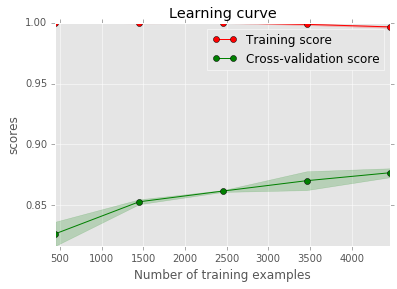

In [242]:
from sklearn.model_selection import learning_curve
def learning_curves(model, X_train, y_train, scoring='accuracy', cv=5):
  plt.figure()
  plt.title("Learning curve")
  plt.xlabel("Number of training examples")
  plt.ylabel("scores")
  train_sizes, train_scores, test_scores = learning_curve(model, X_train, y_train, scoring=scoring, cv=cv, verbose=1)
  train_scores_mean = np.mean(train_scores, axis=1)
  train_scores_std = np.std(train_scores, axis=1)
  test_scores_mean = np.mean(test_scores, axis=1)
  test_scores_std = np.std(test_scores, axis=1)
  plt.plot(train_sizes, train_scores_mean, 'o-', label="Training score", color="r")
  plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.2, color="r")
  plt.plot(train_sizes, test_scores_mean, 'o-', label="Cross-validation score", color="g")
  plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.2, color="g")
  plt.legend(loc="best")
  plt.autoscale(tight=True)
  plt.show()
model = LogisticRegression()
learning_curves(model, X_train, y_train, cv=3)

5−Fold Cross Validation Accuracy: 0.88 (+/− 0.00)
−−−−−− training set report−−−−−
             precision    recall  f1-score   support

          A       1.00      1.00      1.00       727
          B       1.00      1.00      1.00       675
          C       0.98      0.99      0.99       680
          D       0.99      1.00      0.99       651
          E       0.99      0.98      0.99       661
          F       1.00      0.99      0.99       699
          G       0.99      0.99      0.99       711
          H       1.00      0.99      1.00       635
          I       0.98      0.98      0.98       627
          J       0.99      0.99      0.99       633

avg / total       0.99      0.99      0.99      6699

−−−−−−− testing set report −−−−−
             precision    recall  f1-score   support

          A       0.90      0.89      0.89       330
          B       0.89      0.86      0.87       386
          C       0.88      0.90      0.89       336
          D       0.91      0.93 

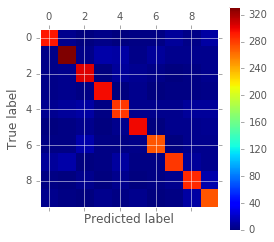

In [243]:
from sklearn import cross_validation, metrics
from scipy.stats import sem
cv = cross_validation.KFold(X_train.shape[0], 5,
shuffle=True , random_state=33)
model = LogisticRegression()
scores = cross_validation.cross_val_score(model, X_train, y_train , cv=cv )
print("%d−Fold Cross Validation Accuracy: %0.2f (+/− %0.2f)"%(5,scores.mean() , sem(scores)))
print "−−−−−− training set report−−−−−"
y_pred_train = logreg.predict(X_train)
print metrics.classification_report(y_train, y_pred_train)
print "−−−−−−− testing set report −−−−−"
y_pred_test = logreg.predict(X_test)
print metrics.classification_report(y_test, y_pred_test)
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_test)
plt.matshow(confusion_matrix)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.colorbar()

[learning_curve] Training set sizes: [ 223  725 1227 1729 2231]


[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:  1.2min finished


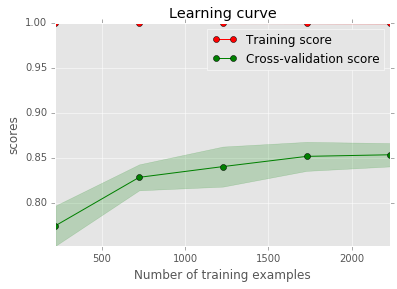

In [213]:
print "toto"

toto
